In [25]:
!pip install flask numpy pandas scikit-learn joblib


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn  
import sklearn.datasets
import sklearn.model_selection
import sklearn.linear_model
import sklearn.metrics
import sklearn.preprocessing
import sklearn.pipeline


In [2]:
df = pd.read_csv('C:\\Users\\Cyber World\\Documents\\Machine Learning\\Personality Detector\\Data_Set.csv')

In [4]:
df.head()

,personality_type,social_energy,alone_time_preference,talkativeness,deep_reflection,group_comfort,party_liking,listening_skill,empathy,creativity,...,spontaneity,adventurousness,reading_habit,sports_interest,online_social_usage,travel_desire,gadget_usage,work_style_collaborative,decision_speed,stress_handling
0,Extrovert,6.794295,3.854670,8.725446,2.515151,7.097368,8.588762,6.774799,6.430132,6.142968,...,4.853313,8.257134,5.270555,10.000000,9.154296,4.816422,9.191711,8.313590,8.032376,7.176905
1,Ambivert,6.378988,5.731157,7.029529,7.274493,4.111199,3.258248,5.550909,3.958179,6.149457,...,6.067201,6.289347,5.753165,5.334303,4.683781,4.725666,5.956141,5.890619,3.158988,3.423577
2,Ambivert,7.459421,6.322263,3.922269,4.622261,5.343276,7.452152,9.483990,6.127654,7.032017,...,5.524244,9.238784,5.250405,3.153540,5.000338,6.139166,6.033048,5.807500,4.571003,5.647480
3,Extrovert,6.159626,3.097837,6.019093,1.965440,7.837140,10.000000,9.436733,8.949684,8.923875,...,4.327018,8.489791,5.312617,8.379936,7.601946,6.370056,5.410145,6.671781,6.600233,5.870088
4,Introvert,5.568462,6.986722,3.913240,9.926161,1.650483,0.362298,7.470387,6.756837,9.507803,...,5.187689,3.167217,7.060235,2.333388,7.771569,5.534336,5.704598,5.832968,5.813099,3.758084


In [5]:
df.isnull().sum()

personality_type            0
social_energy               0
alone_time_preference       0
talkativeness               0
deep_reflection             0
group_comfort               0
party_liking                0
listening_skill             0
empathy                     0
creativity                  0
organization                0
leadership                  0
risk_taking                 0
public_speaking_comfort     0
curiosity                   0
routine_preference          0
excitement_seeking          0
friendliness                0
emotional_stability         0
planning                    0
spontaneity                 0
adventurousness             0
reading_habit               0
sports_interest             0
online_social_usage         0
travel_desire               0
gadget_usage                0
work_style_collaborative    0
decision_speed              0
stress_handling             0
dtype: int64

In [6]:
df.describe()

,social_energy,alone_time_preference,talkativeness,deep_reflection,group_comfort,party_liking,listening_skill,empathy,creativity,organization,...,spontaneity,adventurousness,reading_habit,sports_interest,online_social_usage,travel_desire,gadget_usage,work_style_collaborative,decision_speed,stress_handling
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,5.509190,5.454690,5.525955,5.958689,6.014381,5.040063,6.964450,6.483220,5.996018,5.973280,...,5.495280,5.033716,5.940795,5.492490,6.498574,5.508935,6.006893,6.501986,5.516168,5.981982
std,2.468526,2.493731,2.488006,2.162427,2.178551,2.810563,1.647944,1.534911,1.496690,1.697589,...,1.922809,2.203344,2.170924,1.931728,1.889493,1.932081,1.683523,1.889782,1.944257,1.490327
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.308044,0.804853,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.590989,3.509578,3.595866,4.382619,4.415537,2.727584,5.812701,5.448486,4.992667,4.805742,...,4.156240,3.429189,4.325104,4.127064,5.157772,4.155375,4.867919,5.160594,4.149764,4.973047
50%,5.540706,5.464038,5.574786,5.972345,6.051489,5.053005,6.989855,6.481365,6.003320,5.986871,...,5.499699,5.045021,5.962857,5.508153,6.528960,5.498701,6.006740,6.525735,5.528102,5.978661
75%,7.424123,7.416314,7.472371,7.598495,7.668598,7.363676,8.155574,7.521483,7.013412,7.142282,...,6.853083,6.656162,7.564929,6.861487,7.885414,6.877156,7.160525,7.878841,6.905844,6.991311
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


personality_type
Extrovert    6857
Ambivert     6573
Introvert    6570
Name: count, dtype: int64

Proportion (%):
personality_type
Extrovert    34.285
Ambivert     32.865
Introvert    32.850
Name: proportion, dtype: float64


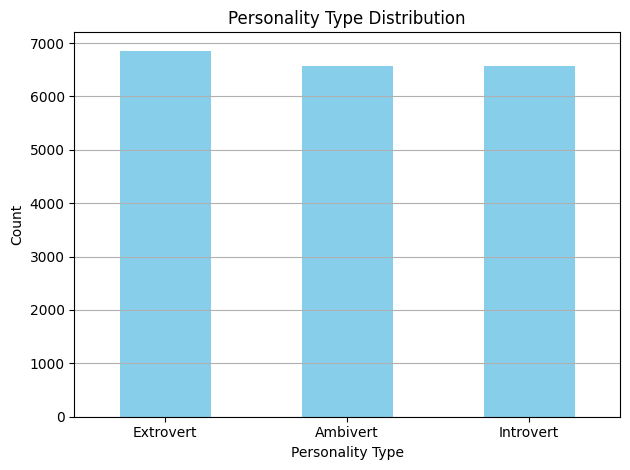

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Check class distribution
print(df['personality_type'].value_counts())
print("\nProportion (%):")
print(df['personality_type'].value_counts(normalize=True) * 100)

# Optional: visualize with a bar plot
df['personality_type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Personality Type Distribution')
plt.xlabel('Personality Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import joblib


# Define features and target
features = ['social_energy', 'alone_time_preference', 'talkativeness',
            'deep_reflection', 'group_comfort', 'party_liking', 'listening_skill',
            'empathy', 'creativity', 'organization', 'leadership', 'risk_taking',
            'public_speaking_comfort', 'curiosity', 'routine_preference',
            'excitement_seeking', 'friendliness', 'emotional_stability', 'planning',
            'spontaneity', 'adventurousness', 'reading_habit', 'sports_interest',
            'online_social_usage', 'travel_desire', 'gadget_usage',
            'work_style_collaborative', 'decision_speed', 'stress_handling']


target = 'personality_type'  # Replace with your target column name

# Encode target labels
le = LabelEncoder()
df[target] = le.fit_transform(df[target])

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    df[features], df[target], test_size=0.2, random_state=42, stratify=df[target])

# Train model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Save model and encoder
joblib.dump(clf, 'rf_personality_model.joblib')
joblib.dump(le, 'label_encoder.joblib')

print("Model and label encoder saved successfully!")


Model and label encoder saved successfully!


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Step 4: Train and evaluate
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = round(accuracy * 100, 2)

# Step 5: Show comparison
for name, acc in results.items():
    print(f"{name}: {acc}% accuracy")


NameError: name 'X' is not defined

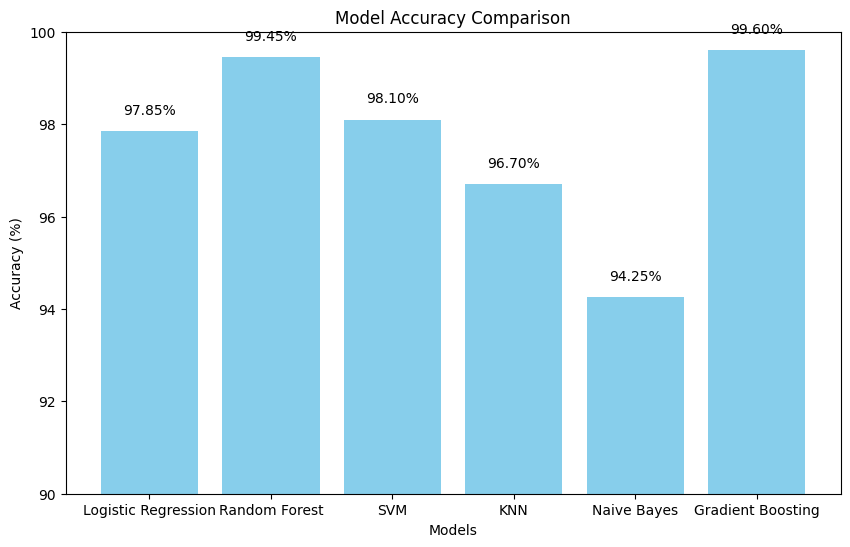

In [22]:
import matplotlib.pyplot as plt

# Sample results dictionary (replace with your actual results)
results = {
    "Logistic Regression": 97.85,
    "Random Forest": 99.45,
    "SVM": 98.10,
    "KNN": 96.70,
    "Naive Bayes": 94.25,
    "Gradient Boosting": 99.60
}

# Prepare data
models = list(results.keys())
accuracies = list(results.values())

# Plot
plt.figure(figsize=(10,6))
bars = plt.bar(models, accuracies, color='skyblue')
plt.ylim([90, 100])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')

# Add accuracy labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.3, f'{yval:.2f}%', ha='center', va='bottom')

plt.show()


In [23]:
print(X.columns)


Index(['social_energy', 'alone_time_preference', 'talkativeness',
       'deep_reflection', 'group_comfort', 'party_liking', 'listening_skill',
       'empathy', 'creativity', 'organization', 'leadership', 'risk_taking',
       'public_speaking_comfort', 'curiosity', 'routine_preference',
       'excitement_seeking', 'friendliness', 'emotional_stability', 'planning',
       'spontaneity', 'adventurousness', 'reading_habit', 'sports_interest',
       'online_social_usage', 'travel_desire', 'gadget_usage',
       'work_style_collaborative', 'decision_speed', 'stress_handling'],
      dtype='object')


In [24]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy: {scores.mean():.4f} ± {scores.std():.4f}")


Cross-validation accuracy: 0.9948 ± 0.0008
